In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
read_file = pd.read_csv(r'/eos/user/i/ishenogi/SWAN_projects/multiclass_predict.txt')
read_file.to_csv(r'/eos/user/i/ishenogi/SWAN_projects/multiclass_predict.csv',index=None)

In [ ]:
# Open csv file
df = pd.read_csv('multiclass_predict.csv')
print(df) 

In [ ]:
import ROOT
cn = ROOT.TCanvas()
cl = ROOT.TCanvas()

In [ ]:
# Create ROOT Histogram for most energetic pileup, and for soft pileup
h0 = ROOT.TH1F("histogram","Probability that a particle originates from most-energetic pile-up vertex", 50,0,1.1)
h1 = ROOT.TH1F("histogram","Probability that a particle originates from most-energetic pile-up vertex", 50,0,1.1)

# 0 and 1 probabilities
full_pile0 = df['class_prob_0']
full_pile1 = df['class_prob_1']

# Fill histogram with predictions of probability for energetic particles corresponding to 1, and for soft particles to 0
for part in range(len(full_pile1)):
    if df['class_true'][part]==0:
        h0.Fill(full_pile0[part])
    else:
        h1.Fill(full_pile0[part])

In [ ]:
cn.SetLogy()
h0.SetFillColorAlpha(46, 0.35)
h0.GetYaxis().SetRange(0, 90000)
h1.SetFillColorAlpha(38, 0.35)
h1.GetYaxis().SetRange(0, 90000)
legend = ROOT.TLegend(0.3,0.7,0.6,0.9)
legend.SetHeader("Legend","C")
legend.AddEntry(h0, "most energetic pile-up", "f")
legend.AddEntry(h1, "soft pile-up", "f")

In [ ]:
h1.Draw()
h0.Draw("SAME")
legend.Draw()
cl.Draw()

In [ ]:
h0n = ROOT.TH1F("histogram","Probability that a particle originates from most-energetic pile-up vertex, neutral", 50,0,1.1)
h1n = ROOT.TH1F("histogram","Probability that a particle originates from most-energetic pile-up vertex, neutral", 50,0,1.1)

In [ ]:
# Fill histogram with predictions of probability for energetic particles corresponding to 1, and for soft particles to 0
#nen_parts = []
#nso_parts = []
for part in range(len(full_pile1)):
    if df['charge'][part]!=0:
        continue
    elif df['class_true'][part]==0:
        h0n.Fill(full_pile0[part])
        #nen_parts += full_pile0[part]
    else:
        h1n.Fill(full_pile0[part])
        #nso_parts += full_pile0[part]

In [ ]:
h0n.SetFillColorAlpha(46, 0.35)
h1n.SetFillColorAlpha(38, 0.35)
legendn = ROOT.TLegend(0.1,0.7,0.4,0.9)
legendn.SetHeader("Legend","C")
legendn.AddEntry(h0n, "most energetic pile-up", "f")
legendn.AddEntry(h1n, "soft pile-up", "f")

In [ ]:
h1n.Draw()
h0n.Draw("SAME")
legendn.Draw()
cl.Draw()

In [ ]:
print(h1n.Integral(h1n.FindFixBin(0),h1n.FindFixBin(0.2), ""))
print(h0n.Integral(h1n.FindFixBin(0),h1n.FindFixBin(0.2), ""))

In [ ]:
vals = np.linspace(1,0,num=20)
print(vals)
import array
from ROOT import TGraph
print(h0n.Integral(h0n.FindFixBin(0),h0n.FindFixBin(1), ""))
print(h0n.Integral(h0n.FindFixBin(0.6),h0n.FindFixBin(1)))

In [ ]:
tru_posn = []
fal_posn = []
for val in vals:
    tru_posn += [h0n.Integral(h0n.FindFixBin(val),h0n.FindFixBin(1), "")/h0n.Integral(h0n.FindFixBin(0),h0n.FindFixBin(1), "")]
    fal_posn += [h1n.Integral(h1n.FindFixBin(val),h1n.FindFixBin(1), "")/h1n.Integral(h1n.FindFixBin(0),h1n.FindFixBin(1), "")]
print(fal_posn)

In [ ]:
cr = ROOT.TCanvas()
roc = TGraph(20, array.array('d', fal_posn),array.array('d', tru_posn));
roc.SetTitle("True-Positive vs. False-Positive Rate, Neutral")
roc.GetXaxis().SetTitle("False-Positive Rate");
roc.GetYaxis().SetTitle("True-Positive Rate");
roc.SetLineColor(ROOT.kViolet-6)

#print("AUC score for neutrals: ")

In [ ]:
roc.Draw()
cr.Draw()

In [ ]:
tru_pos = []
fal_pos = []
for val in vals:
    tru_pos += [h0.Integral(h0.FindFixBin(val),h0.FindFixBin(1), "")/h0.Integral(h0.FindFixBin(0),h0.FindFixBin(1), "")]
    fal_pos += [h1.Integral(h1.FindFixBin(val),h1.FindFixBin(1), "")/h1.Integral(h1.FindFixBin(0),h1.FindFixBin(1), "")]
print(tru_pos)

In [ ]:
crall = ROOT.TCanvas()
rocall = TGraph(20, array.array('d', fal_pos),array.array('d', tru_pos));
rocall.SetTitle("True-Positive vs. False-Positive Rate, All")
rocall.GetXaxis().SetTitle("False-Positive Rate");
rocall.GetYaxis().SetTitle("True-Positive Rate");
rocall.SetLineColor(ROOT.kGreen-6)
print("AUC score: ", rocall.Integral())

In [ ]:
rocall.Draw()
crall.Draw()

In [ ]:
crtgt = ROOT.TCanvas()
roc.SetTitle("True-Positive vs. False-Positive Rate")
legendr = ROOT.TLegend(0.32,0.4,0.9,0.2)
legendr.SetHeader("Legend","C")
legendr.AddEntry(rocall, "All particles - AUC: 0.87319781598637", "l")
legendr.AddEntry(roc, "Neutral particles - AUC: 0.604906566375453", "l")
roc.Draw()
rocall.Draw("SAME")
crtgt.Draw()
legendr.Draw()

In [ ]:
## Normalized histograms
h0norm = ROOT.TH1F("histogram normed","Probability that a particle originates from most-energetic pile-up vertex", 50,0,1.1)
h1norm = ROOT.TH1F("histogram normed","Probability that a particle originates from most-energetic pile-up vertex", 50,0,1.1)
for part in range(len(full_pile1)):
    if df['class_true'][part]==0:
        h0norm.Fill(full_pile0[part])
    else:
        h1norm.Fill(full_pile0[part])
h0norm.Scale(1./h0norm.Integral(),"")
h1norm.Scale(1./h1norm.Integral(),"")

In [ ]:
h0norm.SetFillColorAlpha(46, 0.35)
#h0.GetYaxis().SetRange(0, 90000)
h1norm.SetFillColorAlpha(38, 0.35)
#h1.GetYaxis().SetRange(0, 90000)
legendnorm = ROOT.TLegend(0.3,0.7,0.6,0.9)
legendnorm.SetHeader("Legend","C")
legendnorm.AddEntry(h0norm, "most energetic pile-up", "f")
legendnorm.AddEntry(h1norm, "soft pile-up", "f")

In [ ]:
cnorm = ROOT.TCanvas()

In [ ]:
h1norm.Draw("HIST")
h0norm.Draw("HISTSAME")
legendnorm.Draw()
cnorm.Draw()

In [ ]:
## Normalized histograms
h0normn = ROOT.TH1F("histogram normed","Probability that a particle originates from most-energetic pile-up vertex, Neutral", 50,0,1.1)
h1normn = ROOT.TH1F("histogram normed","Probability that a particle originates from most-energetic pile-up vertex, Neutral", 50,0,1.1)
for part in range(len(full_pile1)):
    if df['charge'][part]!=0:
        continue
    elif df['class_true'][part]==0:
        h0normn.Fill(full_pile0[part])
    else:
        h1normn.Fill(full_pile0[part])
h0normn.Scale(1./h0normn.Integral(),"")
h1normn.Scale(1./h1normn.Integral(),"")

In [ ]:
h0normn.SetFillColorAlpha(46, 0.35)
#h0.GetYaxis().SetRange(0, 90000)
h1normn.SetFillColorAlpha(38, 0.35)
#h1.GetYaxis().SetRange(0, 90000)
legendnormn = ROOT.TLegend(0.1,0.7,0.4,0.9)
legendnormn.SetHeader("Legend","C")
legendnormn.AddEntry(h0normn, "most energetic pile-up", "f")
legendnormn.AddEntry(h1normn, "soft pile-up", "f")
cnormn = ROOT.TCanvas()

In [ ]:
h1normn.Draw("HIST")
h0normn.Draw("HISTSAME")
legendnormn.Draw()
cnormn.Draw()

In [ ]:
plt.figure()
plt.plot(fal_posn,tru_posn)

In [ ]:
from sklearn.metrics import auc
print("AUC for neutrals: ", auc(fal_posn, tru_posn))
print("AUC for all: ", auc(fal_pos, tru_pos))

### Graphs with primary ###

In [2]:
read_file = pd.read_csv(r'/eos/user/i/ishenogi/SWAN_projects/multiclass_predict_withpr.txt')
read_file.to_csv(r'/eos/user/i/ishenogi/SWAN_projects/multiclass_predict_withpr.csv',index=None)

In [3]:
dfp = pd.read_csv('multiclass_predict_withpr.csv')
print(dfp) 

         Unnamed: 0  class_true  charge      inputz        pt       eta  \
0                 0           0    -1.0  -26.862175  0.126024  2.537561   
1                 1           0    -1.0  -26.862175  0.979794  2.020115   
2                 2           0     1.0  -26.862175  0.048996  1.188750   
3                 3           0     1.0  -26.862175  0.864245  2.600723   
4                 4           0    -1.0  -26.862175 -4.735928  0.645426   
...             ...         ...     ...         ...       ...       ...   
3352637     3352637           1     0.0 -199.000000  0.468070  0.986506   
3352638     3352638           1     0.0 -199.000000 -0.396427 -1.135153   
3352639     3352639           1     0.0 -199.000000 -0.306396  1.080719   
3352640     3352640           1     0.0 -199.000000  0.791228 -1.284955   
3352641     3352641           1     0.0 -199.000000  0.274038  1.534248   

              phi    energy  particleID  pred  vtx_truth  class_prob_0  \
0        0.656789  1.1346

In [4]:
import ROOT
cnp = ROOT.TCanvas()
clp = ROOT.TCanvas()

Welcome to JupyROOT 6.24/06


In [5]:
# Create ROOT Histogram for most energetic pileup, and for soft pileup
h0p = ROOT.TH1F("histogramp","Probability that a particle originates from primary vertex", 50,0,1.1)
h1p = ROOT.TH1F("histogramp","Probability that a particle originates from primary vertex", 50,0,1.1)

# 0 and 1 probabilities
full_pile0p = dfp['class_prob_0']
full_pile1p = dfp['class_prob_1']

# Fill histogram with predictions of probability for energetic particles corresponding to 0, and for soft particles to 1
for part in range(len(full_pile1p)):
    if dfp['class_true'][part]==0:
        h0p.Fill(full_pile0p[part])
    else:
        h1p.Fill(full_pile0p[part])

Warning in <TROOT::Append>: Replacing existing TH1: histogramp (Potential memory leak).


In [6]:
cnp.SetLogy()
h0p.SetFillColorAlpha(46, 0.35)
h0p.GetYaxis().SetRange(0, 90000)
h1p.SetFillColorAlpha(38, 0.35)
h1p.GetYaxis().SetRange(0, 90000)
legendp = ROOT.TLegend(0.3,0.7,0.6,0.9)
legendp.SetHeader("Legend","C")
legendp.AddEntry(h0p, "primary", "f")
legendp.AddEntry(h1p, "pile-up", "f")

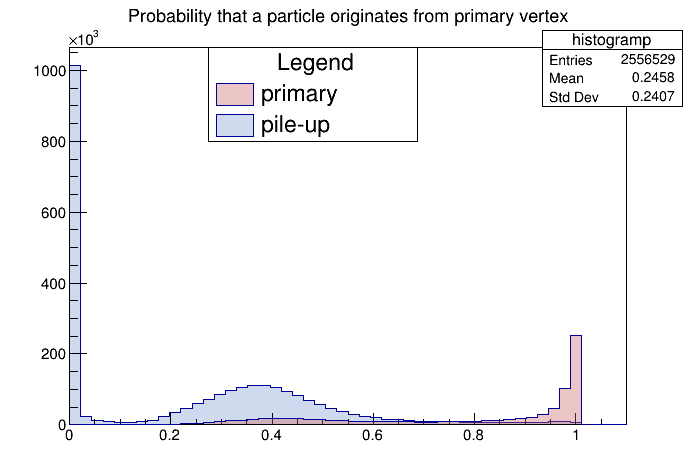

In [7]:
h1p.Draw()
h0p.Draw("SAME")
legendp.Draw()
clp.Draw()

In [8]:
h0pn = ROOT.TH1F("histogrampn","Probability that a particle originates from primary vertex, neutral", 50,0,1.1)
h1pn = ROOT.TH1F("histogrampn","Probability that a particle originates from primary vertex, neutral", 50,0,1.1)

Warning in <TROOT::Append>: Replacing existing TH1: histogrampn (Potential memory leak).


In [9]:
# Fill histogram with predictions of probability for energetic particles corresponding to 1, and for soft particles to 0
#nen_parts = []
#nso_parts = []
for part in range(len(full_pile1p)):
    if dfp['charge'][part]!=0:
        continue
    elif dfp['class_true'][part]==0:
        h0pn.Fill(full_pile0p[part])
        #nen_parts += full_pile0[part]
    else:
        h1pn.Fill(full_pile0p[part])
        #nso_parts += full_pile0[part]

In [10]:
h0pn.SetFillColorAlpha(46, 0.35)
h1pn.SetFillColorAlpha(38, 0.35)
legendpn = ROOT.TLegend(0.4,0.7,0.7,0.9)
legendpn.SetHeader("Legend","C")
legendpn.AddEntry(h0pn, "most energetic pile-up", "f")
legendpn.AddEntry(h1pn, "soft pile-up", "f")

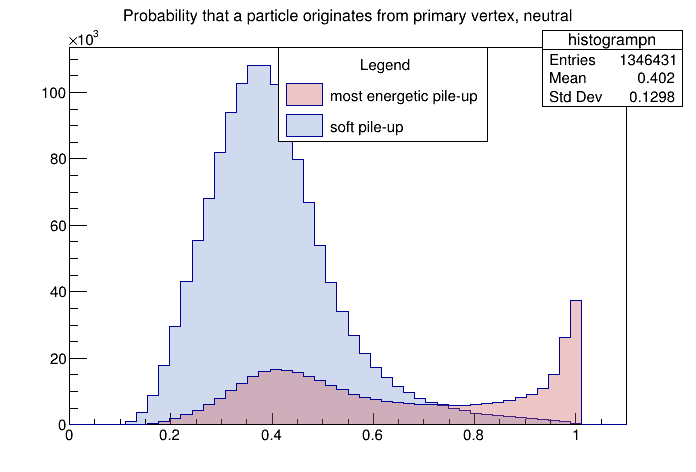

In [11]:
h1pn.Draw()
h0pn.Draw("SAME")
legendpn.Draw()
clp.Draw()

In [12]:
valsp = np.linspace(1,0,num=20)
print(valsp)
import array
from ROOT import TGraph
print(h0pn.Integral(h0pn.FindFixBin(0),h0pn.FindFixBin(1), ""))
print(h0pn.Integral(h0pn.FindFixBin(0.6),h0pn.FindFixBin(1)))

[1.         0.94736842 0.89473684 0.84210526 0.78947368 0.73684211
 0.68421053 0.63157895 0.57894737 0.52631579 0.47368421 0.42105263
 0.36842105 0.31578947 0.26315789 0.21052632 0.15789474 0.10526316
 0.05263158 0.        ]
386062.0
191764.0


In [13]:
tru_pospn = []
fal_pospn = []
for valp in valsp:
    tru_pospn += [h0pn.Integral(h0pn.FindFixBin(valp),h0pn.FindFixBin(1), "")/h0pn.Integral(h0pn.FindFixBin(0),h0pn.FindFixBin(1), "")]
    fal_pospn += [h1pn.Integral(h1pn.FindFixBin(valp),h1pn.FindFixBin(1), "")/h1pn.Integral(h1pn.FindFixBin(0),h1pn.FindFixBin(1), "")]
print(fal_pospn)

[0.00021538422689317165, 0.0019176623235798939, 0.00603001564877814, 0.009921043113237885, 0.018144264355173047, 0.02616472734213636, 0.037183487308298756, 0.06355988535617496, 0.0923240775056427, 0.16942568909955283, 0.2591205936286375, 0.38715091972778404, 0.623886407844145, 0.7700416879884673, 0.9228077784899487, 0.9766464081709348, 0.9965092901158693, 0.999971034535004, 0.9999992572957693, 1.0]


In [14]:
crp = ROOT.TCanvas()
rocp = TGraph(20, array.array('d', fal_pospn),array.array('d', tru_pospn));
rocp.SetTitle("True-Positive vs. False-Positive Rate, Neutral")
rocp.GetXaxis().SetTitle("False-Positive Rate");
rocp.GetYaxis().SetTitle("True-Positive Rate");
rocp.SetLineColor(ROOT.kViolet-6)

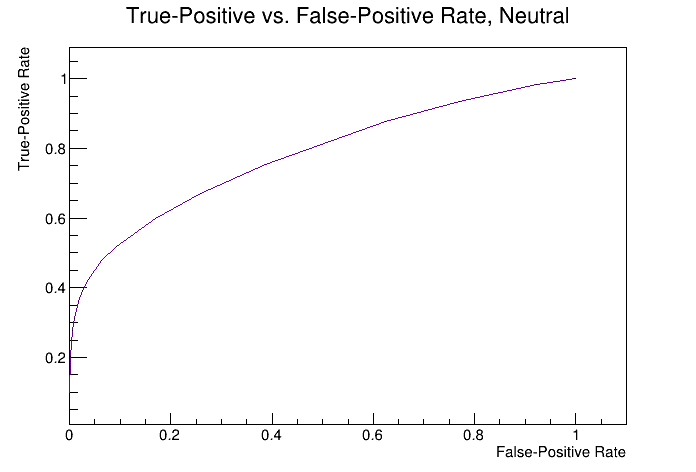

In [15]:
rocp.Draw()
crp.Draw()

In [16]:
tru_posp = []
fal_posp = []
for valp in valsp:
    tru_posp += [h0p.Integral(h0p.FindFixBin(valp),h0p.FindFixBin(1), "")/h0p.Integral(h0p.FindFixBin(0),h0p.FindFixBin(1), "")]
    fal_posp += [h1p.Integral(h1p.FindFixBin(valp),h1p.FindFixBin(1), "")/h1p.Integral(h1p.FindFixBin(0),h1p.FindFixBin(1), "")]
print(tru_posp)

[0.31611969657573735, 0.5027276278618739, 0.588475505361676, 0.6213929429616147, 0.6583198616276835, 0.6793319541321395, 0.6990201139787945, 0.7295534679122185, 0.7521294087648361, 0.7946296568451966, 0.8310553903779991, 0.872799464397642, 0.9336714762854017, 0.9634147413746541, 0.9879740690077916, 0.9948411846057029, 0.9972604391587626, 0.9985605058578367, 0.9991960940218285, 1.0]


In [17]:
crpall = ROOT.TCanvas()
rocpall = TGraph(20, array.array('d', fal_posp),array.array('d', tru_posp));
rocpall.SetTitle("True-Positive vs. False-Positive Rate, All")
rocpall.GetXaxis().SetTitle("False-Positive Rate");
rocpall.GetYaxis().SetTitle("True-Positive Rate");
rocpall.SetLineColor(ROOT.kGreen-6)
print("AUC score: ", rocpall.Integral())

AUC score:  0.2665717879211844


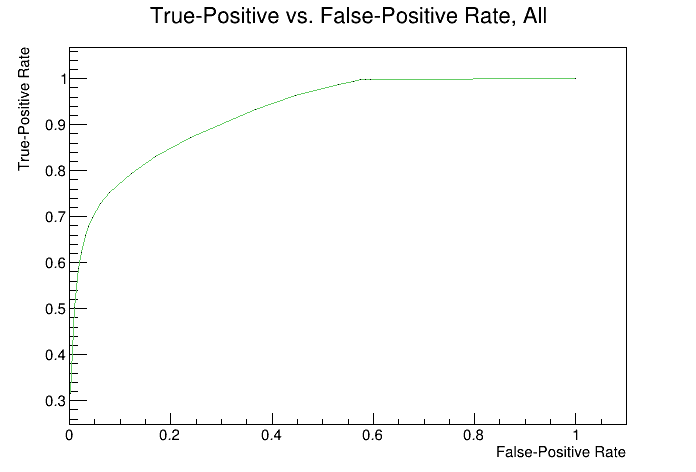

In [18]:
rocpall.Draw()
crpall.Draw()

In [19]:
from sklearn.metrics import auc
print("AUC for neutrals: ", auc(fal_pospn, tru_pospn))
print("AUC for all: ", auc(fal_posp, tru_posp))

AUC for neutrals:  0.7788679976309719
AUC for all:  0.9230630184795195


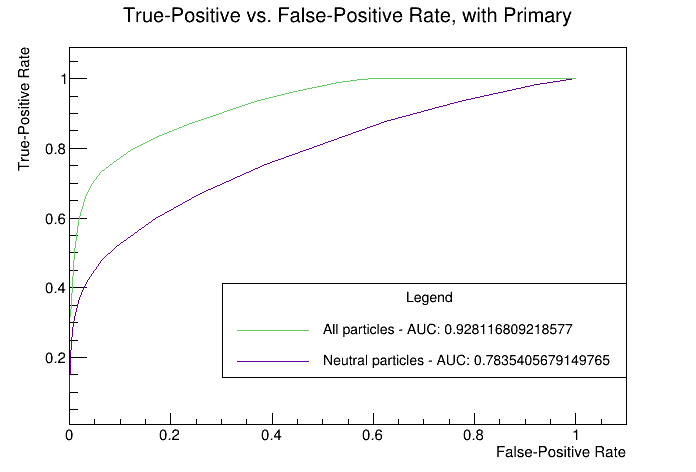

In [20]:
crptgt = ROOT.TCanvas()
rocp.SetTitle("True-Positive vs. False-Positive Rate, with Primary")
legendpr = ROOT.TLegend(0.32,0.4,0.9,0.2)
legendpr.SetHeader("Legend","C")
legendpr.AddEntry(rocpall, "All particles - AUC: 0.928116809218577", "l")
legendpr.AddEntry(rocp, "Neutral particles - AUC: 0.7835405679149765", "l")
rocp.Draw()
rocpall.Draw("SAME")
crptgt.Draw()
legendpr.Draw()

In [21]:
## Normalized histograms
h0pnorm = ROOT.TH1F("histogram normedp","Probability that a particle originates from primary vertex", 50,0,1.1)
h1pnorm = ROOT.TH1F("histogram normedp","Probability that a particle originates from primary vertex", 50,0,1.1)
for part in range(len(full_pile1p)):
    if dfp['class_true'][part]==0:
        h0pnorm.Fill(full_pile0p[part])
    else:
        h1pnorm.Fill(full_pile0p[part])
h0pnorm.Scale(1./h0pnorm.Integral(),"")
h1pnorm.Scale(1./h1pnorm.Integral(),"")

Warning in <TROOT::Append>: Replacing existing TH1: histogram normedp (Potential memory leak).


In [22]:
h0pnorm.SetFillColorAlpha(46, 0.35)
#h0.GetYaxis().SetRange(0, 90000)
h1pnorm.SetFillColorAlpha(38, 0.35)
#h1.GetYaxis().SetRange(0, 90000)
legendpnorm = ROOT.TLegend(0.3,0.7,0.6,0.9)
legendpnorm.SetHeader("Legend","C")
legendpnorm.AddEntry(h0pnorm, "primary", "f")
legendpnorm.AddEntry(h1pnorm, "pile-up", "f")

In [23]:
cpnorm = ROOT.TCanvas()

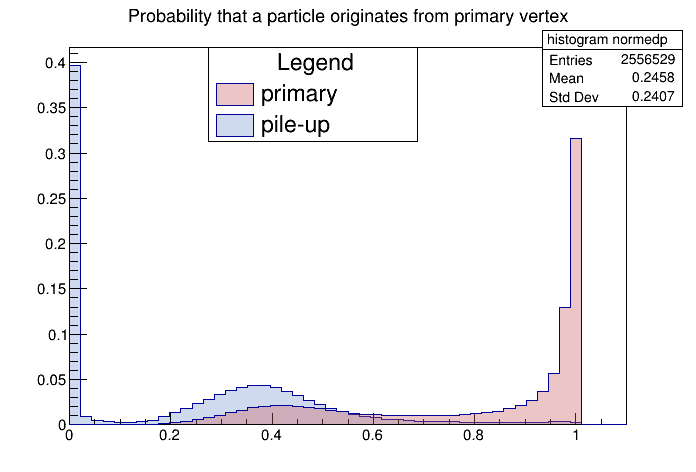

In [24]:
h1pnorm.Draw("HIST")
h0pnorm.Draw("HISTSAME")
legendpnorm.Draw()
cpnorm.Draw()

In [25]:
## Normalized histograms
h0pnormn = ROOT.TH1F("histogram normed","Probability that a particle originates from primary vertex, Neutral", 50,0,1.1)
h1pnormn = ROOT.TH1F("histogram normed","Probability that a particle originates from primary vertex, Neutral", 50,0,1.1)
for part in range(len(full_pile1p)):
    if dfp['charge'][part]!=0:
        continue
    elif dfp['class_true'][part]==0:
        h0pnormn.Fill(full_pile0p[part])
    else:
        h1pnormn.Fill(full_pile0p[part])
h0pnormn.Scale(1./h0pnormn.Integral(),"")
h1pnormn.Scale(1./h1pnormn.Integral(),"")

Warning in <TROOT::Append>: Replacing existing TH1: histogram normed (Potential memory leak).


In [26]:
h0pnormn.SetFillColorAlpha(46, 0.35)
#h0.GetYaxis().SetRange(0, 90000)
h1pnormn.SetFillColorAlpha(38, 0.35)
#h1.GetYaxis().SetRange(0, 90000)
legendpnormn = ROOT.TLegend(0.4,0.7,0.7,0.9)
legendpnormn.SetHeader("Legend","C")
legendpnormn.AddEntry(h0pnormn, "primary", "f")
legendpnormn.AddEntry(h1pnormn, "pile-up", "f")
cpnormn = ROOT.TCanvas()

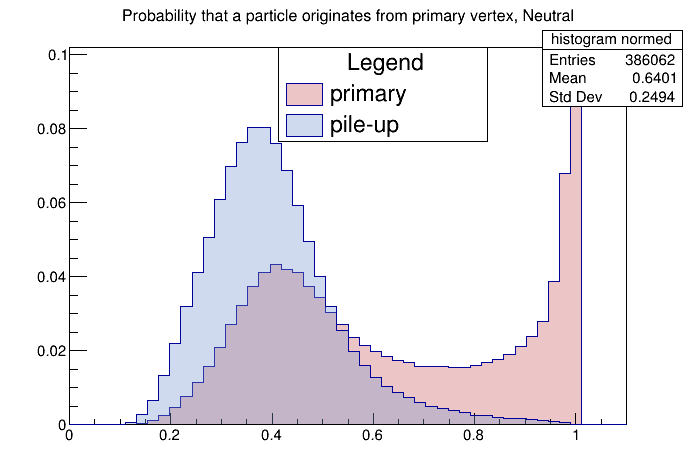

In [27]:
h0pnormn.Draw("HIST")
h1pnormn.Draw("HISTSAME")
legendpnormn.Draw()
cpnormn.Draw()

### Multiclass graph with primary, analysis ###

In [28]:
#print(full_pile0p.to_numpy())
print(len(dfp['class_true'].to_numpy().tolist()))
print(len(dfp['class_true'].to_numpy()))

3352642
3352642


In [29]:
#full_pile0pnpile = dfp['class_prob_0'][dfp['charge']==0][abs(dfp['class_prob_0']-0.27)<0.05]

In [30]:
counter = 0
npile_idx = []
nprim_idx = []
while counter<len(dfp['class_true']):
    if counter%10000==0:
        print(counter)
    if dfp['charge'][counter]==0:
        if abs(dfp['class_prob_0'].to_numpy()[counter]-0.375)<0.01:
            npile_idx += [counter]
        elif abs(dfp['class_prob_0'].to_numpy()[counter]-1.0)<0.01:
            nprim_idx += [counter]
    counter+=1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [46]:
print(npile_idx[0])
print(dfp['class_prob_0'][71])
print(counter)
print(len(npile_idx))
print(len(nprim_idx))

71
0.37990004
3352642
113374
37822


In [78]:
#Check that input z is dummy for neutrals
for idx in npile_idx:
    if dfp['inputz'][idx]!=-199.000000:
        print('not dummy')
for idx in nprim_idx:
    if dfp['eta'][idx]>50:
        print('large')

large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large
large


In [95]:
## pt graphs
hptpile = ROOT.TH1F("histpt","Transferous momenta of neutral successful classifications", 100,-20,20)
hptprim = ROOT.TH1F("histpt","Transferous momenta of neutral successful classifications", 100,-20,20)

Warning in <TROOT::Append>: Replacing existing TH1: histpt (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histpt (Potential memory leak).


In [55]:
for idxpi in npile_idx:
    hptpile.Fill(dfp['pt'][idxpi])
for idxpr in nprim_idx:
    hptprim.Fill(dfp['pt'][idxpr])

In [56]:
hptprim.SetFillColorAlpha(46, 0.35)
hptpile.SetFillColorAlpha(38, 0.35)
legendpt = ROOT.TLegend(0.1,0.7,0.4,0.9)
legendpt.SetHeader("Legend","C")
legendpt.AddEntry(hptpile, "primary", "f")
legendpt.AddEntry(hptprim, "pile-up", "f")

In [57]:
c = ROOT.TCanvas()

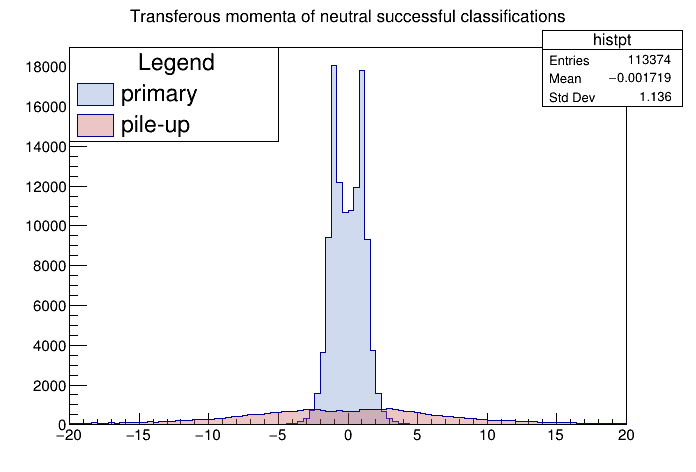

In [58]:
hptpile.Draw()
hptprim.Draw("SAME")
legendpt.Draw()
c.Draw()

In [71]:
## eta graphs
hetapile = ROOT.TH1F("histeta","Eta angles of neutral successful classifications", 100,-20,20)
hetaprim = ROOT.TH1F("histeta","Eta angles of neutral successful classifications", 100,-20,20)

Warning in <TROOT::Append>: Replacing existing TH1: histeta (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histeta (Potential memory leak).


In [72]:
for idxpi in npile_idx:
    hetapile.Fill(dfp['eta'][idxpi])
for idxpr in nprim_idx:
    hetaprim.Fill(dfp['eta'][idxpr])

In [73]:
hetaprim.SetFillColorAlpha(46, 0.35)
hetapile.SetFillColorAlpha(38, 0.35)
legendeta = ROOT.TLegend(0.1,0.7,0.4,0.9)
legendeta.SetHeader("Legend","C")
legendeta.AddEntry(hetapile, "primary", "f")
legendeta.AddEntry(hetaprim, "pile-up", "f")

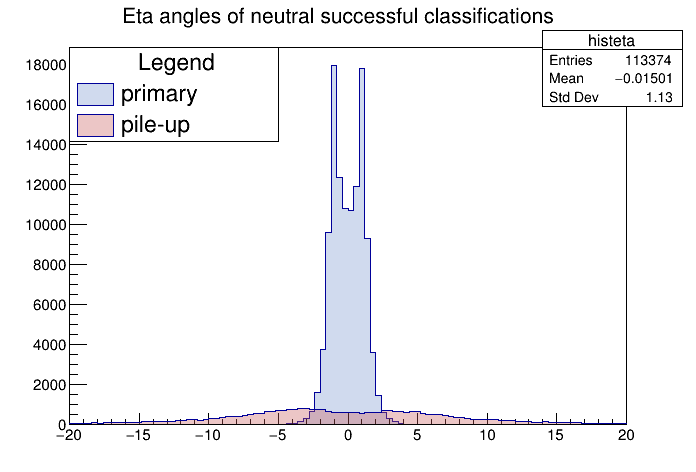

In [74]:
hetapile.Draw()
hetaprim.Draw("SAME")
legendeta.Draw()
c.Draw()

In [87]:
## phi graphs
hphipile = ROOT.TH1F("histphi","Phi angles of neutral successful classifications", 100,-6,6)
hphiprim = ROOT.TH1F("histphi","Phi angles of neutral successful classifications", 100,-6,6)

Warning in <TROOT::Append>: Replacing existing TH1: histphi (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histphi (Potential memory leak).


In [88]:
for idxpi in npile_idx:
    hphipile.Fill(dfp['phi'][idxpi])
for idxpr in nprim_idx:
    hphiprim.Fill(dfp['phi'][idxpr])

In [93]:
hphiprim.SetFillColorAlpha(46, 0.35)
hphipile.SetFillColorAlpha(38, 0.35)
legendphi = ROOT.TLegend(0.35,0.7,0.65,0.9)
legendphi.SetHeader("Legend","C")
legendphi.AddEntry(hphipile, "primary", "f")
legendphi.AddEntry(hphiprim, "pile-up", "f")

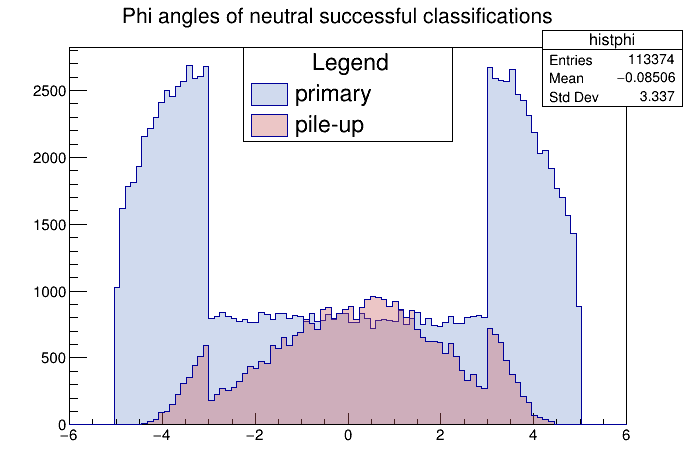

In [94]:
hphipile.Draw()
hphiprim.Draw("SAME")
legendphi.Draw()
c.Draw()

In [108]:
## energy graphs
hepile = ROOT.TH1F("histe","Energies of neutral successful classifications", 100,-1,8)
heprim = ROOT.TH1F("histe","Energies of neutral successful classifications", 100,-1,8)

Warning in <TROOT::Append>: Replacing existing TH1: histe (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histe (Potential memory leak).


In [109]:
for idxpi in npile_idx:
    hepile.Fill(dfp['energy'][idxpi])
for idxpr in nprim_idx:
    heprim.Fill(dfp['energy'][idxpr])

In [110]:
heprim.SetFillColorAlpha(46, 0.35)
hepile.SetFillColorAlpha(38, 0.35)
legende = ROOT.TLegend(0.1,0.7,0.4,0.9)
legende.SetHeader("Legend","C")
legende.AddEntry(hepile, "primary", "f")
legende.AddEntry(heprim, "pile-up", "f")

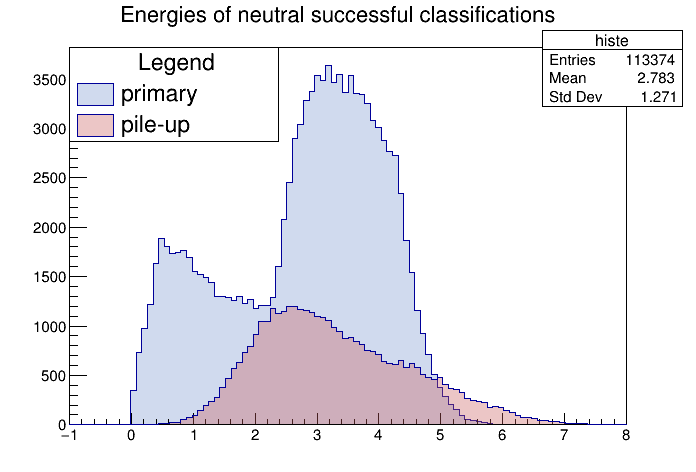

In [111]:
hepile.Draw()
heprim.Draw("SAME")
legende.Draw()
c.Draw()